In [1]:
using Pkg
# Pkg.add("Plots")
# Pkg.add("ProgressMeter")
# Pkg.add("Statistics")
# Pkg.add("DataFrames")
# Pkg.add("CSV")
# Pkg.add("GLM)
# Pkg.add("DelimitedFiles")
# Pkg.add("LaTeXStrings")

In [2]:
using Plots
using ProgressMeter
using Statistics
using DataFrames
using CSV
using GLM
using DelimitedFiles
using LaTeXStrings

Grid initializer

In [3]:
L = 40
k_b = 1.0
J = 1.0
mu = 1.0

1.0

Loading dataframes

In [4]:
df_dict = Dict{Int, DataFrame}()
L_arr = collect(10:5:60)
for (i,L) in enumerate(L_arr)
    df_dict[L] = CSV.read("DataFrames/H_zero/p_zero/Problem_3_1_3_L_$L.csv", DataFrame)
end

In [5]:
function line_fitter(df, ksi)
    r2_arr = zeros(size(df,1))
    model_arr = []
    slope_arr = []

    for i in 1:length(df.T)
        data_row = Vector(df[i, 2:end])    # Exclude T
        df_row = DataFrame(log_ksi=log.(ksi), log_param=log.(data_row))
        model = lm(@formula(log_param ~ log_ksi), df_row)
        r2_arr[i] = r2(model)

        push!(model_arr, model)
        push!(slope_arr, coef(model)[2])
    end
    return r2_arr, model_arr, slope_arr
end



line_fitter (generic function with 1 method)

In [6]:
df_M = DataFrame(T=df_dict[L_arr[1]].T)
for L in L_arr
    df_M[!, "M_$(L)"] = abs.(df_dict[L].M)
end

r2_arr, model_arr, slope_arr = line_fitter(df_M, L_arr)

([0.02323331561180142, 0.03594715409879956, 0.15064589434728948, 0.2801795387769116, 0.3054883904201823, 0.023248754047912712, 0.08450870057428972, 0.07954773397418047, 0.07960953469855037, 0.05745513942903635  …  0.33062626364896064, 0.28163504357578173, 0.4240296245503318, 0.41877794254835266, 0.14910850598896697, 0.03593576669849807, 0.11164765021020784, 0.33623649853520243, 0.3986187731858427, 0.057265115893097795], Any[StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

log_param ~ 1 + log_ksi

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   0.160906     0.527525   0.31    0.7673  -1.03244    1.35425
log_ksi      -0.0703509    0.152051  -0.4

In [7]:
plot(df_M.T, r2_arr, ylabel="R^2", xlabel=L"$|\tau|$", legend=false,lw=2, fontsize=40, guidefont=font(14), tickfontsize=14, legendfontsize=14)
savefig("figures/Problem_3_1_3_M_r2.png")

"c:\\Users\\jonas\\Documents\\Codespace\\TFY4235\\Numerical_Physics\\Exam_Ising_model\\figures\\Problem_3_1_3_M_r2.png"

In [8]:
best_index = argmax(r2_arr) # -1 since argmax finds from 4900, so no need for double counting
T_c_approx = df_M[best_index, 1]
println("Best index: ", best_index, " at ", T_c_approx)

Best index: 83 at 2.64


T_max: [2.22, 2.32, 2.32, 2.26, 2.2, 2.32, 2.26, 2.28, 2.24, 2.32, 2.28]
T_max: Mean: 2.274545454545455 Std: 0.04297991074063226


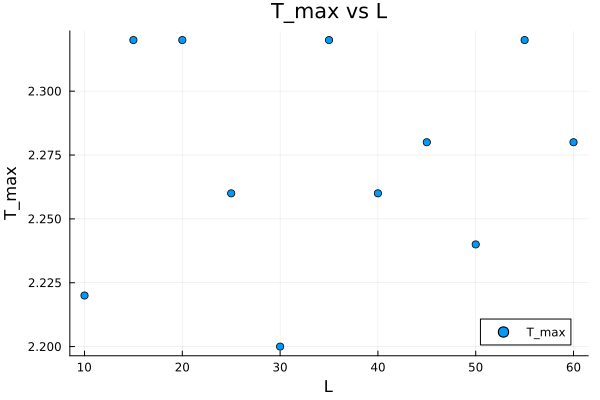

In [9]:
T_max = zeros(length(L_arr))
for (i,L) in enumerate(L_arr)
    T_max[i] = df_dict[L].T[argmax(df_dict[L].C)]
end
println("T_max: ", T_max)
println("T_max: Mean: ", mean(T_max), " Std: ", std(T_max))
scatter(L_arr, T_max, label="T_max", xlabel="L", ylabel="T_max", title="T_max vs L")

In [10]:
df_ksi = DataFrame(L=L_arr)
df_ksi[!, "T_max"] = abs.((T_max.- T_c_approx)/T_c_approx)  # Shifted T_max
df_ksi[!, "T_c"] = T_max
model_ksi_non_log = lm(@formula(T_c ~ L), df_ksi)
println("Slope: ", coef(model_ksi_non_log)[2])
println(r2(model_ksi_non_log))

Slope: 0.00029090909090910544
0.01259842519684895


In [11]:
scatter(L_arr, T_max , label=L"$T_{max}$", xlabel="L", ylabel=L"$T_{max}$")
plot!(L_arr, predict(model_ksi_non_log), label="Linear Fit", lw=2, guidefont=font(14), tickfontsize=14, legendfontsize=10)
annotate!(52, 2.225, text("R^2: $(round(r2(model_ksi_non_log),digits=4))", 10))
annotate!(52.5, 2.232, text("Slope: $(round(coef(model_ksi_non_log)[2],digits=4))", 10))
savefig("figures/Problem_3_1_3_T_max.png")

"c:\\Users\\jonas\\Documents\\Codespace\\TFY4235\\Numerical_Physics\\Exam_Ising_model\\figures\\Problem_3_1_3_T_max.png"

In [12]:
model_ksi = lm(@formula(log(L) ~ log(T_max) ), df_ksi)
println(r2(model_ksi))
println(coeftable(model_ksi))

0.011878093034768389
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   2.36687      3.22647   0.73    0.4819   -4.93191    9.66564
log(T_max)   -0.534176     1.62403  -0.33    0.7497   -4.20799    3.13964
─────────────────────────────────────────────────────────────────────────


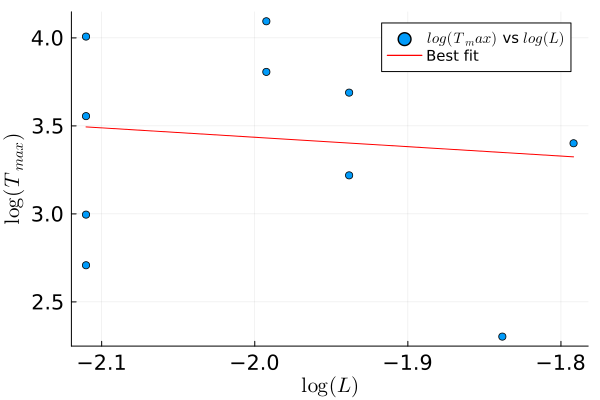

In [13]:
T_max_of_L = scatter(log.(df_ksi.T_max), log.(df_ksi.L), label=L"$log(T_max)$ vs $log(L)$", xlabel=L"$\log(L)$", ylabel=L"$\log(T_{max})$", lw=2, guidefont=font(14), tickfontsize=14, legendfontsize=10)
plot!(T_max_of_L, log.(df_ksi.T_max), predict(model_ksi), color=:red, label="Best fit")
annotate!(T_max_of_L, 3.6, -1.855, text("R^2: $(round(r2(model_ksi),digits=4))",8))
annotate!(T_max_of_L, 3.6, -1.87, text("Slope: $(round(coef(model_ksi)[2],digits=4))",8))



In [14]:
nu = - coef(model_ksi)[2]

0.5341757835764012

In [15]:
df_C = DataFrame(L=L_arr)
C_max = zeros(length(L_arr))
for (i,L) in enumerate(L_arr)
    C_max[i] = maximum(df_dict[L].C)
end
df_C[!, "C_max"] = C_max

11-element Vector{Float64}:
  141.1434960106453
  338.850169525091
  708.8628560390358
 1269.0222818018863
 1731.5163209790474
 2833.5563380248846
 4361.721671862544
 4327.077561309424
 5585.027638137814
 6070.6636287676465
 7717.049941421273

In [16]:
model_C = lm(@formula(log(C_max) ~ log(L) ), df_C)
println(r2(model_C))
println(coeftable(model_C))

0.9927358957705824
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -0.231273   0.224351   -1.03    0.3295  -0.738789   0.276243
log(L)        2.26788    0.0646654  35.07    <1e-10   2.12159    2.41416
─────────────────────────────────────────────────────────────────────────


In [17]:
alpha = coef(model_C)[2]*nu

1.2114441903958906